# 8 Tests of Means of Numerical Data

<div id="toc"></div>

## 8.1 Distribution of a Sample Mean

### 8.1.1 One Sample t-Test for a Mean Value

* a) Example

### 8.1.2 Wilcoxon Signed Rank Sum Test

* https://github.com/thomas-haslwanter/statsintro_python/tree/master/ISP/Code_Quantlets/08_TestsMeanValues/oneGroup.

## 8.2 Comparison of Two Groups

### 8.2.1 Paired t-Test

In [1]:
import numpy as np
from scipy import stats
np.random.seed(1234)
data = np.random.randn(10)+0.1
data1 = np.random.randn(10) *5 # dummy data
data2 = data1 + data # same group-difference as "data"

In [2]:
stats.ttest_1samp(data, 0)

Ttest_1sampResult(statistic=-0.12458492298731401, pvalue=0.90359045085470857)

In [3]:
stats.ttest_rel(data2, data1)

Ttest_relResult(statistic=-0.1245849229873135, pvalue=0.9035904508547089)

### 8.2.2 t-Test between Independent Groups

### 8.2.3 Nonparametric Comparison of Two Groups: Mann–Whitney Test

### 8.2.4 Statistical Hypothesis Tests vs Statistical Modeling

* a) Classical t-Test

In [4]:
import numpy as np
from scipy import stats
# Generate the data
np.random.seed(123)
race_1 = np.round(np.random.randn(20) *10+90)
race_2 = np.round(np.random.randn(20) *10+85)
# t-test
(t, pVal) = stats.ttest_rel (race_1, race_2)
# Show the result
print('The probability that the two distributions '
      'are equal is {0:5.3f} .'.format(pVal))

The probability that the two distributions are equal is 0.033 .


* b) Statistical Modeling

In [5]:
import pandas as pd
import statsmodels.formula.api as sm
np.random.seed(123)
df = pd.DataFrame({'Race1': race_1, 'Race2':race_2})
result = sm.ols(formula='I(Race2-Race1) ~ 1', data=df).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:       I(Race2 - Race1)   R-squared:                      -0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                      -inf
Date:                Wed, 05 Apr 2017   Prob (F-statistic):                nan
Time:                        01:28:02   Log-Likelihood:                -85.296
No. Observations:                  20   AIC:                             172.6
Df Residuals:                      19   BIC:                             173.6
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -9.1000      3.950     -2.304      0.0

C:\Anaconda36\lib\site-packages\statsmodels\regression\linear_model.py:1191: RuntimeWarning: divide by zero encountered in double_scalars
  return self.ess/self.df_model


* https://github.com/thomas-haslwanter/statsintro_python/tree/master/ISP/Code_Quantlets/08_TestsMeanValues/twoGroups.

## 8.3 Comparison of Multiple Groups

### 8.3.1 Analysis of Variance (ANOVA

* a) Principle

* b) Example: One-Way ANOVA

In [ ]:
from scipy import stats
F_statistic, pVal = stats.f_oneway(group_1, group_2, group_3)

In [ ]:
import pandas as pd
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
df = pd.DataFrame(data, columns=['value', 'treatment'])
model = ols('value ~ C(treatment)', df).fit()
anovaResults = anova_lm(model)
print(anovaResults)

* https://github.com/thomas-haslwanter/statsintro_python/tree/master/ISP/Code_Quantlets/08_TestsMeanValues/anovaOneway.

### 8.3.2 Multiple Comparisons

* a) Tukey's Test

* b) Bonferroni Correction

In [10]:
from statsmodels.sandbox.stats.multicomp import multipletests
multipletests([.05, 0.3, 0.01], method='bonferroni')

(array([False, False,  True], dtype=bool),
 array([ 0.15,  0.9 ,  0.03]),
 0.016952427508441503,
 0.016666666666666666)

* https://github.com/thomas-haslwanter/statsintro_python/tree/master/ISP/Code_Quantlets/08_TestsMeanValues/multipleTesting.

* c) Holm Correction

### 8.3.3 Kruskal–Wallis Test

### 8.3.4 Two-Way ANOVA

* https://github.com/thomas-haslwanter/statsintro_python/tree/master/ISP/Code_Quantlets/08_TestsMeanValues/kruskalWallis.

In [ ]:
import pandas as pd
from C2_8_getdata import getData
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
# Get the data
data = getData('altman_12_6.txt', subDir='..\Data\data_altman')
# Bring them in DataFrame-format
df = pd.DataFrame(data, columns=['hs', 'fetus', 'observer'])
# Determine the ANOVA with interaction
formula = 'hs ~ C(fetus) + C(observer) + C(fetus):C(observer)'
lm = ols(formula, df).fit()
anovaResults = anova_lm(lm)
print(anovaResults)

* https://github.com/thomas-haslwanter/statsintro_python/tree/master/ISP/Code_Quantlets/08_TestsMeanValues/anovaTwoway.

### 8.3.5 Three-Way ANOVA

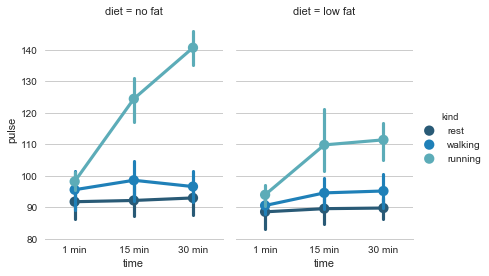

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
df = sns.load_dataset("exercise")
sns.factorplot("time", "pulse", hue="kind", col="diet", data=df,
               hue_order=["rest", "walking", "running"],
               palette="YlGnBu_d", aspect=.75).despine(left=True)
plt.show()

## 8.4 Summary: Selecting the Right Test for Comparing Groups

### 8.4.1 Typical Tests

* http://www.r-bloggers.com/beware-the-friedman-test/

### 8.4.2 Hypothetical Examples

## 8.5 Exercises

### 8.1 One or Two Groups  
* Paired t-Test and Wilcoxon signed rank sum test  
The daily energy intake from 11 healthy women is [5260., 5470., 5640., 6180., 6390., 6515., 6805., 7515., 7515., 8230., 8770.] kJ.  
Is this value significantly different from the recommended value of 7725? (Correct answer: yes, pttest D 0:018, and pWilcoxon D 0:026.)  
* t-Test of independent samples  
In a clinic, 15 lazy patients weigh [76, 101, 66, 72, 88, 82, 79, 73, 76, 85, 75, 64, 76, 81, 86.] kg, and 15 sporty patients weigh [ 64, 65, 56, 62, 59, 76, 66, 82, 91, 57, 92, 80, 82, 67, 54] kg.  
Are the lazy patients significantly heavier? (Correct answer: yes, p D 0:045.)  
* Normality test  
Are the two data sets normally distributed? (Correct answer: yes, they are.)  
* Mann–Whitney test  
Are the lazy patients still heavier, if you check with the Mann–Whitney test? (Correct answer: no, p D 0:077. Note, however, that the answer would be "yes" for a one-sided test!)  

### 8.2 Multiple Groups  
The following example is taken from the really good, but somewhat advanced book by A.J. Dobson: “An Introduction to Generalized Linear Models”:  
* Get the data  
The file  Data/data_others/Table  6.6  Plant  experiment.xls,  which  can  also be found on https://github.com/thomas-haslwanter/statsintro/tree/master/Data/data_others, contains data from an experiment with plants in three different growing conditions. Read the data into Python. Hint: use the module xlrd.  
* Perform an ANOVA  
Are the three groups different? (Correct answer: yes, they are.)  
* Multiple Comparisons  
Using the Tukey test, which of the pairs are different? (Correct answer: only TreamtmentA and TreatmentB differ.)  
* Kruskal–Wallis  
Would a nonparametric comparison lead to a different result? (Correct answer: no.)  
   